In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('crop_recommendation.csv')

In [3]:
print("Shape of the Dataset:",data.shape)

Shape of the Dataset: (2200, 8)


In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
missing_value=["na","np","n/a","null"]
data=pd.read_csv("crop_recommendation.csv",na_values=missing_value)

In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# SUMMARY FOR ALL THE CROPS

In [8]:
print("Average ratio of Nitrogen in the soil: {0:.2f}".format(data['N'].mean()))
print("Average ratio of Phosphorus in the soil: {0:.2f}".format(data['P'].mean()))
print("Average ratio of Potassium in the soil: {0:.2f}".format(data['K'].mean()))
print("Average Temperature In Celsius: {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in %: {0:.2f}".format(data['humidity'].mean()))
print("Average Ph Value of the soil: {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall In mm: {0:.2f}".format(data['rainfall'].mean()))

Average ratio of Nitrogen in the soil: 50.55
Average ratio of Phosphorus in the soil: 53.36
Average ratio of Potassium in the soil: 48.15
Average Temperature In Celsius: 25.62
Average Relative Humidity in %: 71.48
Average Ph Value of the soil: 6.47
Average Rainfall In mm: 103.46


# SUMMARY OF STATISTICS FOR EACH CROP

In [9]:
@interact

def summary(Crops =list(data['label'].value_counts().index)):
    x= data[data['label']== Crops]
    print("...........................................................")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen Required:",x['N'].min())
    print("Average Nitrogen Required:",x['N'].mean())
    print("Maximum Nitrogen Required:",x['N'].max())
    print("...........................................................")
    print("Statistics for Phosphorus")
    print("Minimum Phosphorus Required:",x['P'].min())
    print("Average Phosphorus Required:",x['P'].mean())
    print("Maximum Phosphorus Required:",x['P'].max())
    print("...........................................................")
    print("Statistics for Potassium")
    print("Minimum Potassium Required:",x['K'].min())
    print("Average Potassium Required:",x['K'].mean())
    print("Maximum Potassium Required:",x['K'].max())
    print("...........................................................")
    print("Statistics for Temperature")
    print("Minimum Temperature Required:{0:.2f}".format(x['temperature'].min()))
    print("Average Temperature Required:{0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature Required:{0:.2f}".format(x['temperature'].max()))
    print("...........................................................")
    print("Statistics for Humidity")
    print("Minimum humidity Required:{0:.2f}".format(x['humidity'].min()))
    print("Average humidity Required:{0:.2f}".format(x['humidity'].mean()))
    print("Maximum humidity Required:{0:.2f}".format(x['humidity'].max()))
    print("...........................................................")
    print("Statistics for Ph")
    print("Minimum Ph Required:{0:.2f}".format(x['ph'].min()))
    print("Average Ph Required:{0:.2f}".format(x['ph'].mean()))
    print("Maximum Ph Required:{0:.2f}".format(x['ph'].max()))
    print("...........................................................")
    print("Statistics for Rainfall")
    print("Minimum Rainfall Required:{0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall Required:{0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall Required:{0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='Crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

# COMPARISON OF AVERAGE REQUIREMENT FOR EACH CROP WITH AVERAGE CONDITIONS

In [10]:
@interact
def compare(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print("Average value for",conditions,"is:{0:.2f}".format(data[conditions].mean()))
    print("........................................................")
    print("Rice:{0:.2f}".format(data[data['label'] =="rice"][conditions].mean()))
    print("Maize:{0:.2f}".format(data[data['label'] =="maize"][conditions].mean()))
    print("Jute:{0:.2f}".format(data[data['label'] =="jute"][conditions].mean()))
    print("Coconut:{0:.2f}".format(data[data['label'] =="coconut"][conditions].mean()))
    print("Papaya:{0:.2f}".format(data[data['label'] =="papaya"][conditions].mean()))
    print("Orange:{0:.2f}".format(data[data['label'] =="orange"][conditions].mean()))
    print("Apple:{0:.2f}".format(data[data['label'] =="apple"][conditions].mean()))
    print("Muskmelon:{0:.2f}".format(data[data['label'] =="muskmelon"][conditions].mean()))
    print("Watermelon:{0:.2f}".format(data[data['label'] =="watermelon"][conditions].mean()))
    print("Grapes:{0:.2f}".format(data[data['label'] =="grapes"][conditions].mean()))
    print("Mango:{0:.2f}".format(data[data['label'] =="mango"][conditions].mean()))
    print("Banana:{0:.2f}".format(data[data['label'] =="banana"][conditions].mean()))
    print("Pomegranate:{0:.2f}".format(data[data['label'] =="pomegranate"][conditions].mean()))
    print("Lentil:{0:.2f}".format(data[data['label'] =="lentil"][conditions].mean()))
    print("Blackgram:{0:.2f}".format(data[data['label'] =="blackgram"][conditions].mean()))
    print("Mungbean:{0:.2f}".format(data[data['label'] =="mungbean"][conditions].mean()))
    print("Mothbeans:{0:.2f}".format(data[data['label'] =="mothbeans"][conditions].mean()))
    print("Pigeonpeas:{0:.2f}".format(data[data['label'] =="pigeonpeas"][conditions].mean()))
    print("Kidneybeans:{0:.2f}".format(data[data['label'] =="kidneybeans"][conditions].mean()))
    print("Chickpea:{0:.2f}".format(data[data['label'] =="chickpea"][conditions].mean()))
    print("Coffee:{0:.2f}".format(data[data['label'] =="coffee"][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [11]:
@interact
def compare(conditions = ['N','P','K','temperature','humidity','ph','rainfall']):
    print("Crops which require more than average",conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("................................................")
    print("Crops which require less than average",conditions,'\n')
    print(data[data[conditions]<data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

# DISTRIBUTION OF THE SOIL & DIFFERENT CLIMATIC CONDITIONS FOR ALL THE CROPS PRESENT IN THE DATASET

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

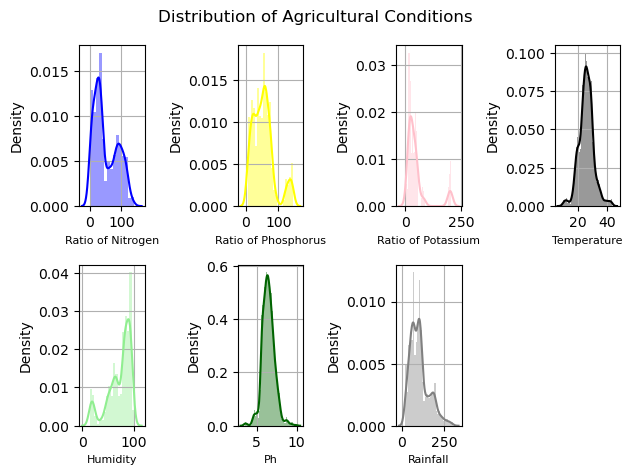

In [12]:
plt.subplot(2,4,1)
sns.distplot(data['N'],color='blue')
plt.xlabel("Ratio of Nitrogen",fontsize=8)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'],color='yellow')
plt.xlabel("Ratio of Phosphorus",fontsize=8)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'],color='pink')
plt.xlabel("Ratio of Potassium",fontsize=8)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'],color='black')
plt.xlabel("Temperature",fontsize=8)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['humidity'],color='lightgreen')
plt.xlabel("Humidity",fontsize=8)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['ph'],color='darkgreen')
plt.xlabel("Ph",fontsize=8)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['rainfall'],color='grey')
plt.xlabel("Rainfall",fontsize=8)
plt.grid()

plt.suptitle("Distribution of Agricultural Conditions",fontsize=12)
plt.tight_layout()
plt.show()

# SOME INTERESTING FACTS

In [13]:
print("Some interesting facts:")
print("...................................")
print("Crops which require very High Ratio of Nitrogen content to grow:",data[data['N']>120]['label'].unique())
print("Crops which require very High Ratio of Phosphorus content to grow:",data[data['P']>120]['label'].unique())
print("Crops which require very High Ratio of Potassium content to grow:",data[data['K']>200]['label'].unique())
print("Crops which require very High Temperature to grow:",data[data['temperature']>40]['label'].unique())
print("Crops which require very Humidity to grow:",data[data['humidity']>95]['label'].unique())
print("Crops which require very Rainfall to grow:",data[data['rainfall']>200]['label'].unique())
print("Crops which require very Ph to grow:",data[data['ph']>9]['label'].unique())
print("......................................")
print("Crops which require very Low Ratio of Nitrogen content to grow:",data[data['N']<5]['label'].unique())
print("Crops which require very Low Ratio of Phosphorus content to grow:",data[data['P']<6]['label'].unique())
print("Crops which require very Low Ratio of Potassium content to grow:",data[data['K']<6]['label'].unique())
print("Crops which require very Low Temperature to grow:",data[data['temperature']<9]['label'].unique())
print("Crops which require very Low Humidity to grow:",data[data['humidity']<15]['label'].unique())
print("Crops which require very Low Rainfall to grow:",data[data['rainfall']<22]['label'].unique())
print("Crops which require very Low Ph to grow:",data[data['ph']<4]['label'].unique())

Some interesting facts:
...................................
Crops which require very High Ratio of Nitrogen content to grow: ['cotton']
Crops which require very High Ratio of Phosphorus content to grow: ['grapes' 'apple']
Crops which require very High Ratio of Potassium content to grow: ['grapes' 'apple']
Crops which require very High Temperature to grow: ['grapes' 'papaya']
Crops which require very Humidity to grow: ['coconut']
Crops which require very Rainfall to grow: ['rice' 'papaya' 'coconut']
Crops which require very Ph to grow: ['mothbeans']
......................................
Crops which require very Low Ratio of Nitrogen content to grow: ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'lentil' 'pomegranate'
 'mango' 'grapes' 'apple' 'orange' 'coconut']
Crops which require very Low Ratio of Phosphorus content to grow: ['pomegranate' 'watermelon' 'muskmelon' 'orange' 'coconut']
Crops which require very Low Ratio of Potassium content to grow: ['orange']
Crops which require 

# CROPS GROWN ACCORDING TO DIFFERENT SEASONS

In [14]:
print("Crops which can be grown in summer:",data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print("Crops which can be grown in winter:",data[(data['temperature']<10) & (data['humidity']>30)]['label'].unique())
print("Crops which can be grown in rainy season:",data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())


Crops which can be grown in summer: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Crops which can be grown in winter: ['grapes']
Crops which can be grown in rainy season: ['rice' 'papaya' 'coconut']


# CLUSTERING SIMILAR CROPS

In [15]:
from sklearn.cluster import KMeans

In [16]:
x=data.drop(['label'],axis=1)
x= x.values
print(x.shape)

(2200, 7)


In [28]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [29]:
wcss

[18820170.46364589,
 12070916.353533497,
 7423970.865410883,
 5337369.950298392,
 4417511.116768208,
 3748646.207999499,
 3122776.0933495285,
 2727858.093756842,
 2374020.0367853655,
 2132297.3163274396]

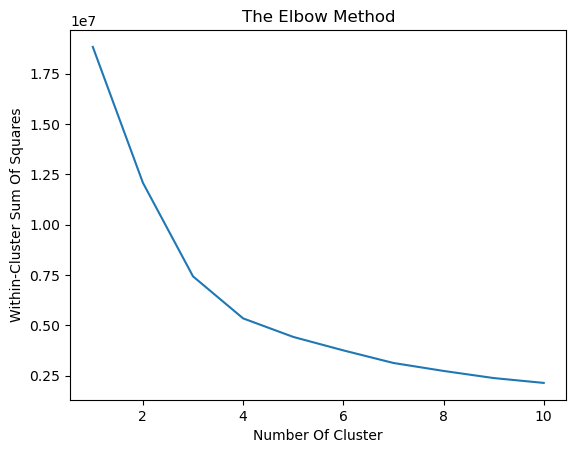

In [30]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Cluster')
plt.ylabel('Within-Cluster Sum Of Squares')
plt.show()

In [31]:
km = KMeans(4)
y_means = km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a],axis=1)
z = z.rename(columns = {0:'cluster'})

print("Crops in First Cluster:",z[z['cluster']==0]['label'].unique())
print('..................................................')
print("Crops in Second Cluster:",z[z['cluster']==1]['label'].unique())
print('..................................................')
print("Crops in Third Cluster:",z[z['cluster']==2]['label'].unique())
print('..................................................')
print("Crops in Fourth Cluster:",z[z['cluster']==3]['label'].unique())
print('..................................................')




Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
..................................................
Crops in Second Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
..................................................
Crops in Third Cluster: ['grapes' 'apple']
..................................................
Crops in Fourth Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
..................................................


# PRDECTIVE MODELLING

In [35]:
y = data['label']
x = data.drop(['label'],axis = 1)

print("Shape of x:",x.shape)
print("Shape of y:",y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [36]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear' )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

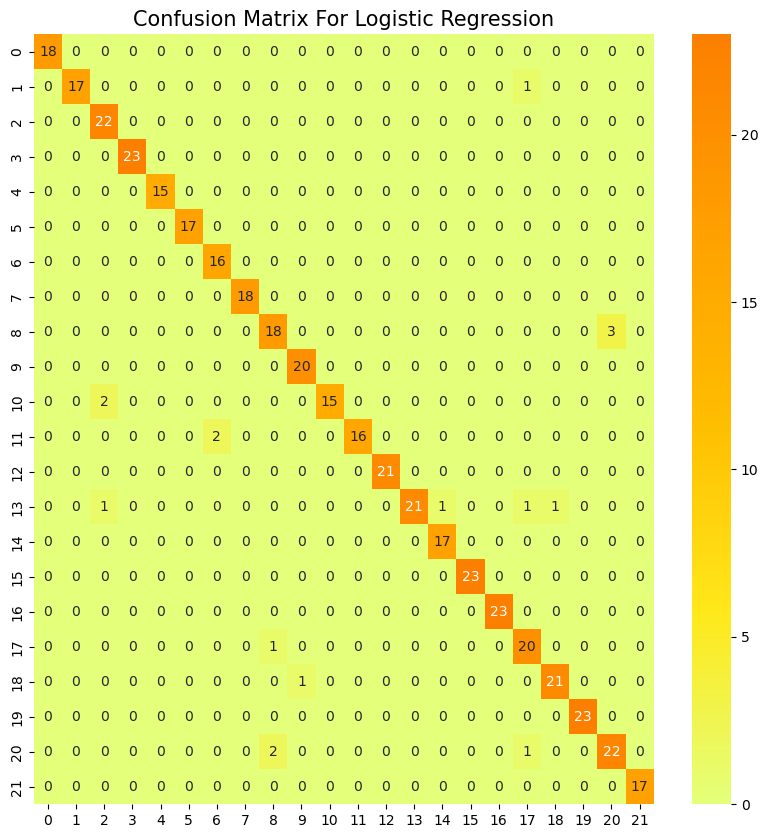

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,cmap='Wistia')
plt.title('Confusion Matrix For Logistic Regression',fontsize=15)
plt.show()

In [42]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      0.94      0.97        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.88      0.94        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.84      0.91        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.87    

In [43]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [44]:
prediction = model.predict(np.array([[90,58,44,26,81,7,202]]))
print("The suggested crop for given conditions is:",prediction)

The suggested crop for given conditions is: ['rice']


D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
